In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fn = "D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/2016-03-30_DEM_10cm_cropped.tif"
fn2 = "D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/2016-09-21_DEM_10cm_cropped.tif"

# Read raster bands directly to Numpy arrays.
#
with rasterio.open(fn) as src:
    z = src.read()

with rasterio.open(fn2) as src2:
    z2 = src2.read()

In [9]:
# 3d array in rasterio is (bands, rows, columns)
print(np.shape(z))
print(np.shape(z2))

# many image processing packages (scikit-image, pillow, matplotlib) use (rows, columns, bands)
from rasterio.plot import reshape_as_raster, reshape_as_image
image = reshape_as_image(z)
print(np.shape(image))

(1, 12265, 13052)
(1, 12242, 13274)
(12265, 13052, 1)


In [4]:
# this obviously wont work because arrays are not the same size
zd = z2-z;

ValueError: operands could not be broadcast together with shapes (1,12242,13274) (1,12265,13052) 

In [ ]:
plt.imshow(z[0,:,:])

In [25]:
# coordinate reference system
print(src.crs)
# data transform
print(src.transform)
# upper left corner
print(src.transform*(0,0))
print(src2.transform*(0,0))
# lower right corner
print(src.transform*(src.width, src.height))

CRS({'init': 'epsg:26919'})
| 0.10, 0.00, 376206.52|
| 0.00,-0.10, 4625437.97|
| 0.00, 0.00, 1.00|
(376206.5224272934, 4625437.967243103)
(376182.87953137304, 4625447.607851961)
(377511.72242729337, 4624211.467243103)


In [11]:
# find the array index of a point by inverting the transform (!)
print( ~src.transform*(376206.5224272934, 4625437.967243103) )

(0.0, 0.0)


5
2814 4814 3359 4359
0
D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/2016-01-25_v1_DEM_10cm.tif
xo,yo:  376056.0 4625535.0
xoc, yoc 432.0 -433.0
xoff, yoff, xend, yend:  4320 6320 4330 5330
1
D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/2016-03-30_DEM_10cm_cropped.tif
xo,yo:  376206.5224272934 4625437.967243103
xoc, yoc 281.4775727065862 -335.96724310331047
xoff, yoff, xend, yend:  2814 4814 3359 4359
2
D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/2016-09-21_DEM_10cm_cropped.tif
xo,yo:  376182.87953137304 4625447.607851961
xoc, yoc 305.120468626963 -345.6078519606963
xoff, yoff, xend, yend:  3051 5051 3456 4456
3
D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/2017-01-25_SandwichTNB_v2_DEM_10cm.tif
xo,yo:  376103.0 4625616.0
xoc, yoc 385.0 -514.0
xoff, yoff, xend, yend:  3850 5850 5140 6140
4
D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/2017-01-09_V1_DEM_10cm.tif
xo,yo:  376140.0 4625467.0
xoc, yoc 348.0 -365.0
xoff, yo

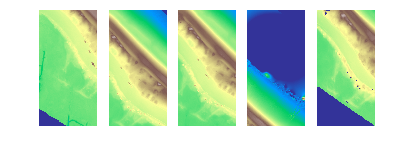

In [51]:
# read into windows
fdir = "D:/crs/proj/2015_Sandwich/Sandwich_all_surveys_preliminary/"
fnames = ("2016-01-25_v1_DEM_10cm.tif",\
          "2016-03-30_DEM_10cm_cropped.tif",\
          "2016-09-21_DEM_10cm_cropped.tif",\
          "2017-01-25_SandwichTNB_v2_DEM_10cm.tif",\
          "2017-01-09_V1_DEM_10cm.tif"
          )
nf=len(fnames)
print(nf)
xy = ~src.transform*(376488., 4625102.)
xoff, yoff = int(xy[0]), int(xy[1])
xsize, ysize = 2000, 1000
print(xoff, xoff+xsize, yoff, yoff+ysize)
zw = []
for i in range(nf):
    print(i)
    print(fdir+fnames[i])
    with rasterio.open(fdir+fnames[i]) as src3:
        xo,yo = src3.transform*(0,0)
        print('xo,yo: ',xo,yo)
        xoc = 376488.-xo
        yoc = 4625102.-yo
        print("xoc, yoc",xoc,yoc)
        xy = ~src3.transform*(376488., 4625102.)
        xoff, yoff = int(xy[0]), int(xy[1])
        print("xoff, yoff, xend, yend: ",xoff, xoff+xsize, yoff, yoff+ysize)
        src3.close()
    with rasterio.open(fdir+fnames[i]) as src3:
        zw[1::] = src3.read(1, window=((xoff,xoff+xsize),(yoff,yoff+ysize)))
        plt.subplot(1,nf,i+1);plt.axis('off');plt.imshow(zw[i::],cmap=plt.cm.terrain,vmin=-2,vmax=8)
        src3.close()

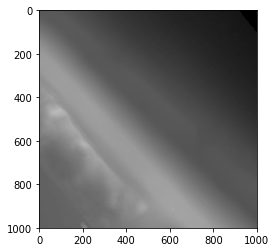

In [30]:
plt.imshow(zw[:,:],cmap=plt.cm.gray,vmin=-2.,vmax=10.)

In [ ]:
# plot 